In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
img1 = cv2.imread('img/sample3.jpg', 0)
img2 = cv2.imread('img/sample4.jpg', 0)

In [31]:
MIN_MATCH_COUNT = 10

In [32]:
t1 = cv2.getTickCount()
sift = cv2.xfeatures2d.SIFT_create(10000)
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
t2 = cv2.getTickCount()
t = (t2-t1)/cv2.getTickFrequency()
print t

9.552177518


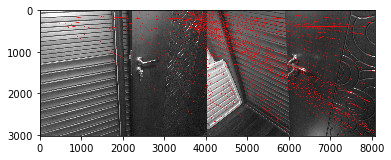

In [38]:
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches[:100], None, matchColor=(255,0,0), flags=2)
plt.imshow(img3)
plt.show()